In [8]:
import os
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
from dateutil import tz

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

sns.set(style="ticks", color_codes=True)

In [9]:
def convert_dtypes(df):
    """
    converts numerical or object data types to dtype
    returns dataframe with converted data types
    """
    for col in df.columns:
        df[col] = df[col].astype('float64')
    return df

In [10]:
basepath = 'data/fangraphs/'
paths = []
for fname in os.listdir(basepath):
    path = os.path.join(basepath, fname)
    if not os.path.isdir(path):
        paths.append(path)
        
#paths

In [11]:
cols = ['Year', 'GS', 'IP', 'Pitches']
pitch_cols = ['FB%', 'SL%', 'CT%', 'CB%', 'CH%', 'SF%', 'KN%']
combined_cols = cols + pitch_cols

In [12]:
df = pd.read_csv('data/fangraphs/fangraphs_2010_to_2018_stats.csv', index_col='Year')
df.fillna('', inplace=True)
df

,GS,IP,IP/GS,Balls,Strikes,Pitches,Pitches/GS,Pitches/IP,FB%,SL%,...,CH%,SF%,KN%,FBv,SLv,CTv,CBv,CHv,SFv,KNv
Year,,,,,,,,,,,,,,,,,,,,,
2010,3701.0,22819.4,6.17,134554.0,232752.0,367306.0,99.25,16.10,0.57,0.14,...,0.12,0.01,0.01,90.68,83.10,87.29,75.79,82.71,85.05,75.90
2011,3825.0,23734.0,6.20,137231.0,241569.0,378800.0,99.03,15.96,0.56,0.13,...,0.12,0.01,0.01,90.76,83.62,87.35,76.02,82.92,84.03,70.95
2012,3580.0,21796.2,6.09,125798.0,222695.0,348493.0,97.34,15.99,0.56,0.12,...,0.11,0.01,0.01,90.86,83.29,87.52,76.50,83.00,84.40,77.10
2013,3625.0,22092.5,6.09,127690.0,226991.0,354681.0,97.84,16.05,0.56,0.13,...,0.12,0.02,0.01,91.06,83.37,87.36,76.75,83.04,82.98,75.60
2014,3714.0,22754.7,6.13,129465.0,233354.0,362819.0,97.69,15.94,0.56,0.12,...,0.11,0.02,0.01,91.35,84.04,87.69,76.71,83.52,84.11,77.75
2015,3492.0,20968.3,6.00,118844.0,215253.0,334097.0,95.67,15.93,0.56,0.12,...,0.12,0.02,0.01,91.71,84.21,87.75,77.40,84.17,83.39,76.10
2016,3539.0,20760.5,5.87,121148.0,215678.0,336826.0,95.18,16.22,0.55,0.13,...,0.11,0.02,0.01,91.76,83.94,87.66,76.91,84.05,84.19,74.65
2017,3383.0,19323.8,5.71,115610.0,202822.0,318432.0,94.13,16.48,0.54,0.14,...,0.11,0.01,0.01,92.25,84.37,88.04,77.69,84.46,84.55,77.20
2018,3454.0,19343.2,5.60,112854.0,203140.0,315994.0,91.49,16.34,0.53,0.16,...,0.13,0.01,0.00,92.42,84.48,88.06,78.28,84.89,86.90,0.00


In [13]:
# for col in df.columns:
#     if df[col].dtype == np.object:
#         df[col] = [val.strip('%') for val in df[col]]
# df.replace('', 0.0, inplace=True)
# df_res = convert_dtypes(df)
# pd.options.display.float_format = '{:,.2f}'.format
# df_res

In [14]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
GS,9.0,3590.333333,140.443939,3383.00,3492.00,3580.00,3701.00,3825.00
IP,9.0,21510.288889,1539.516166,19323.80,20760.50,21796.20,22754.70,23734.00
IP/GS,9.0,5.984444,0.212374,5.60,5.87,6.09,6.13,6.20
Balls,9.0,124799.333333,8342.321754,112854.00,118844.00,125798.00,129465.00,137231.00
Strikes,9.0,221583.777778,13510.567603,202822.00,215253.00,222695.00,232752.00,241569.00
Pitches,9.0,346383.111111,21734.524911,315994.00,334097.00,348493.00,362819.00,378800.00
Pitches/GS,9.0,96.402222,2.523464,91.49,95.18,97.34,97.84,99.25
Pitches/IP,9.0,16.112222,0.194857,15.93,15.96,16.05,16.22,16.48
FB%,9.0,0.554444,0.012360,0.53,0.55,0.56,0.56,0.57
SL%,9.0,0.132222,0.013017,0.12,0.12,0.13,0.14,0.16


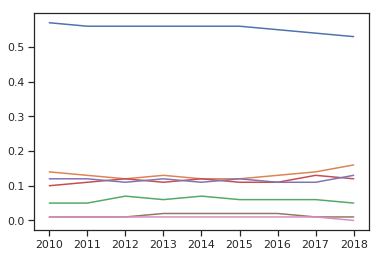

In [15]:
pitch_cols = ['FB%', 'SL%', 'CT%', 'CB%', 'CH%', 'SF%', 'KN%']
plt.plot(df.index, df[pitch_cols])

In [16]:
df_pitches = df[pitch_cols]

In [17]:
df_pitches

,FB%,SL%,CT%,CB%,CH%,SF%,KN%
Year,,,,,,,
2010,0.57,0.14,0.05,0.10,0.12,0.01,0.01
2011,0.56,0.13,0.05,0.11,0.12,0.01,0.01
2012,0.56,0.12,0.07,0.12,0.11,0.01,0.01
2013,0.56,0.13,0.06,0.11,0.12,0.02,0.01
2014,0.56,0.12,0.07,0.12,0.11,0.02,0.01
2015,0.56,0.12,0.06,0.11,0.12,0.02,0.01
2016,0.55,0.13,0.06,0.11,0.11,0.02,0.01
2017,0.54,0.14,0.06,0.13,0.11,0.01,0.01
2018,0.53,0.16,0.05,0.12,0.13,0.01,0.00


In [68]:
df_qlfd = pd.read_csv('data/fangraphs/fangraphs_2010_to_2017_qualified_starters.csv', index_col='year')

In [72]:
df_qlfd

,starters,gs_min,gs_max,gs_mean,gs_total,ip_min,ip_max,ip_mean,ip_sum,pitch_min,pitch_max,pitch_mean,pitch_sum
year,,,,,,,,,,,,,
2010,91,26,35,31.54,2870,162.20,250.20,198.53,"18,066.60",2583,3749,"3,172.74",288719
2011,90,25,34,31.31,2818,161.10,251.00,198.48,"17,863.30",2371,3941,"3,146.21",283159
2012,85,27,34,31.06,2640,168.00,238.10,193.73,"16,467.30",2520,3768,"3,078.45",261668
2013,79,26,34,31.22,2467,165.20,241.20,195.66,"15,456.90",2522,3692,"3,103.16",245150
2014,87,25,34,31.14,2709,162.10,248.10,194.35,"16,908.20",2468,3730,"3,068.10",266925
2015,77,26,34,31.14,2398,163.10,232.20,191.54,"14,748.80",2500,3492,"3,027.38",233108
2016,71,26,35,31.34,2225,163.10,230.00,188.59,"13,390.20",2498,3668,"3,033.63",215388
2017,56,25,34,30.93,1732,162.00,214.10,184.63,"10,339.40",2479,3531,"2,990.84",167487


In [82]:
df_qlfd['ip_sum'] / df_qlfd['gs_total']

year
2010   6.29
2011   6.34
2012   6.24
2013   6.27
2014   6.24
2015   6.15
2016   6.02
2017   5.97
dtype: float64

In [70]:
pd.merge(df_res, df_qlfd, left_index=True, right_index=True)

,FB%,SL%,CT%,CB%,CH%,SF%,KN%,GS,IP,Pitches,...,gs_mean,gs_total,ip_min,ip_max,ip_mean,ip_sum,pitch_min,pitch_max,pitch_mean,pitch_sum
Season,,,,,,,,,,,,,,,,,,,,,
2010,0.57,0.13,0.05,0.10,0.12,0.01,0.01,4860,29061,471397,...,31.54,2870,162.20,250.20,198.53,"18,066.60",2583,3749,"3,172.74",288719
2011,0.56,0.13,0.06,0.11,0.12,0.01,0.01,4858,29299,470897,...,31.31,2818,161.10,251.00,198.48,"17,863.30",2371,3941,"3,146.21",283159
2012,0.56,0.12,0.07,0.12,0.12,0.01,0.01,4860,28617,461057,...,31.06,2640,168.00,238.10,193.73,"16,467.30",2520,3768,"3,078.45",261668
2013,0.56,0.13,0.06,0.11,0.12,0.01,0.01,4862,28676,463397,...,31.22,2467,165.20,241.20,195.66,"15,456.90",2522,3692,"3,103.16",245150
2014,0.56,0.12,0.06,0.11,0.12,0.01,0.01,4860,28992,464644,...,31.14,2709,162.10,248.10,194.35,"16,908.20",2468,3730,"3,068.10",266925
2015,0.57,0.12,0.06,0.11,0.12,0.01,0.01,4858,28223,452423,...,31.14,2398,163.10,232.20,191.54,"14,748.80",2500,3492,"3,027.38",233108
2016,0.56,0.13,0.06,0.12,0.12,0.01,0.01,4856,27412,449680,...,31.34,2225,163.10,230.00,188.59,"13,390.20",2498,3668,"3,033.63",215388
2017,0.55,0.14,0.05,0.12,0.12,0.01,0.01,4860,26787,444925,...,30.93,1732,162.00,214.10,184.63,"10,339.40",2479,3531,"2,990.84",167487
